## LOGISTIC REGRESSION

### 1) Data Exploration:

##### a) Load the dataset and perform exploratory data analysis (EDA).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
### Checking missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
### Checking duplicate values
df.duplicated().sum()

0

<Axes: >

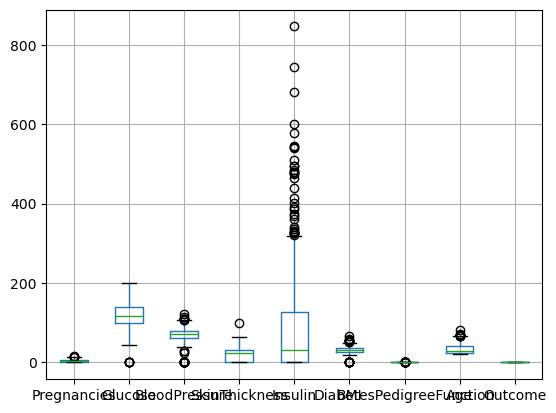

In [8]:
df.boxplot()

In [9]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

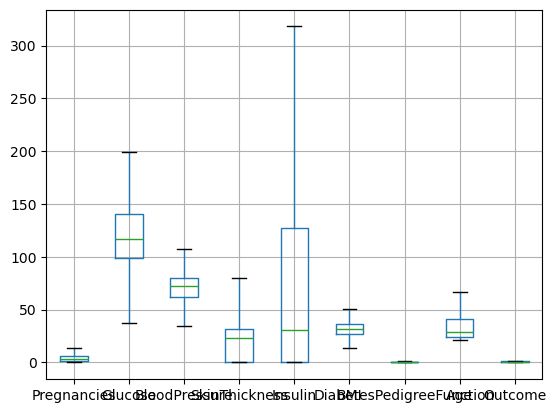

In [10]:
df.boxplot()
plt.show()

##### b) Examine the features, their types, and summary statistics.

In [11]:
### features

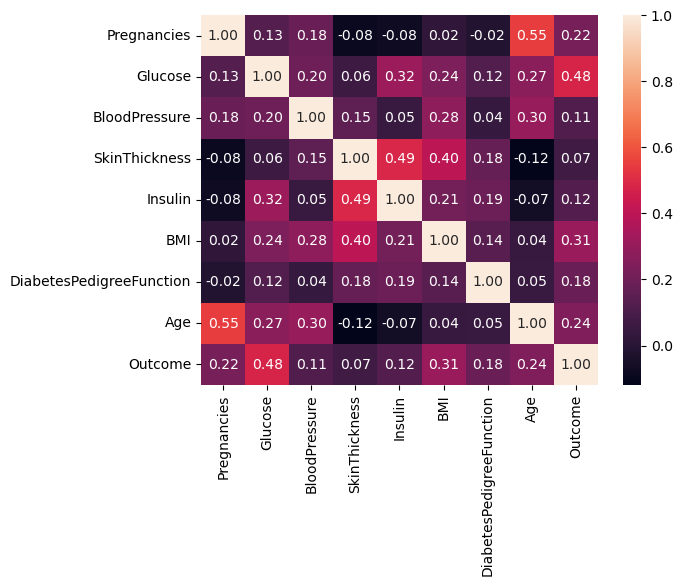

<Figure size 1000x600 with 0 Axes>

In [12]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.2f')
plt.figure(figsize=(10,6))
plt.show()

In [13]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

In [14]:
from sklearn.feature_selection import f_classif

In [15]:
f_clas=f_classif(features,target)
f_clas

(array([ 39.1060998 , 228.27899638,   9.96114593,   4.11804863,
         12.10361486,  81.28714654,  27.13587638,  47.94475658]),
 array([6.66677148e-10, 2.46195991e-45, 1.66135754e-03, 4.27732832e-02,
        5.31674632e-04, 1.53959123e-18, 2.43985294e-07, 9.28460495e-12]))

In [16]:
features.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False)

Glucose                     228.278996
BMI                          81.287147
Age                          47.944757
Pregnancies                  39.106100
DiabetesPedigreeFunction     27.135876
Insulin                      12.103615
BloodPressure                 9.961146
SkinThickness                 4.118049
dtype: float64

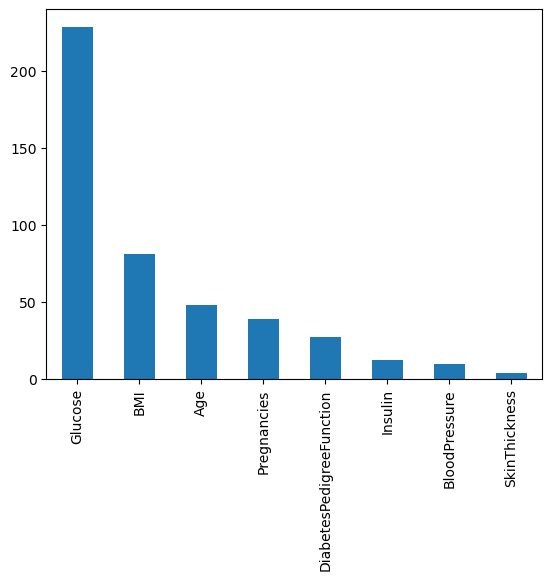

In [18]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [19]:
features.drop(columns=['SkinThickness','BloodPressure','Insulin'],inplace=True)

In [20]:
features.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,33.6,0.627,50.0
1,1.0,85.0,26.6,0.351,31.0
2,8.0,183.0,23.3,0.672,32.0
3,1.0,89.0,28.1,0.167,21.0
4,0.0,137.0,43.1,1.200,33.0


In [21]:
### Types of features

In [22]:
features.dtypes

Pregnancies                 float64
Glucose                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [23]:
### summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


##### c) Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

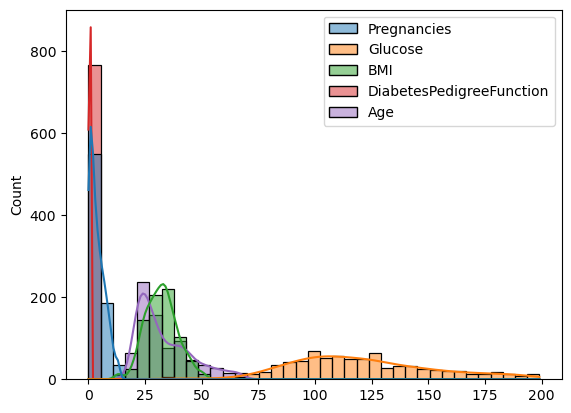

In [24]:
### histogram
sns.histplot(data=features,kde=True)
plt.show()

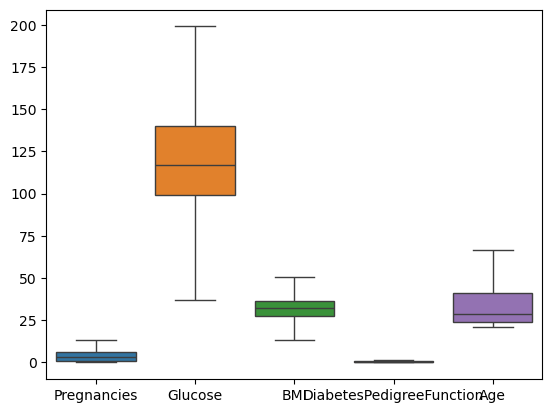

In [25]:
### boxplot
sns.boxplot(data=features)
plt.show()

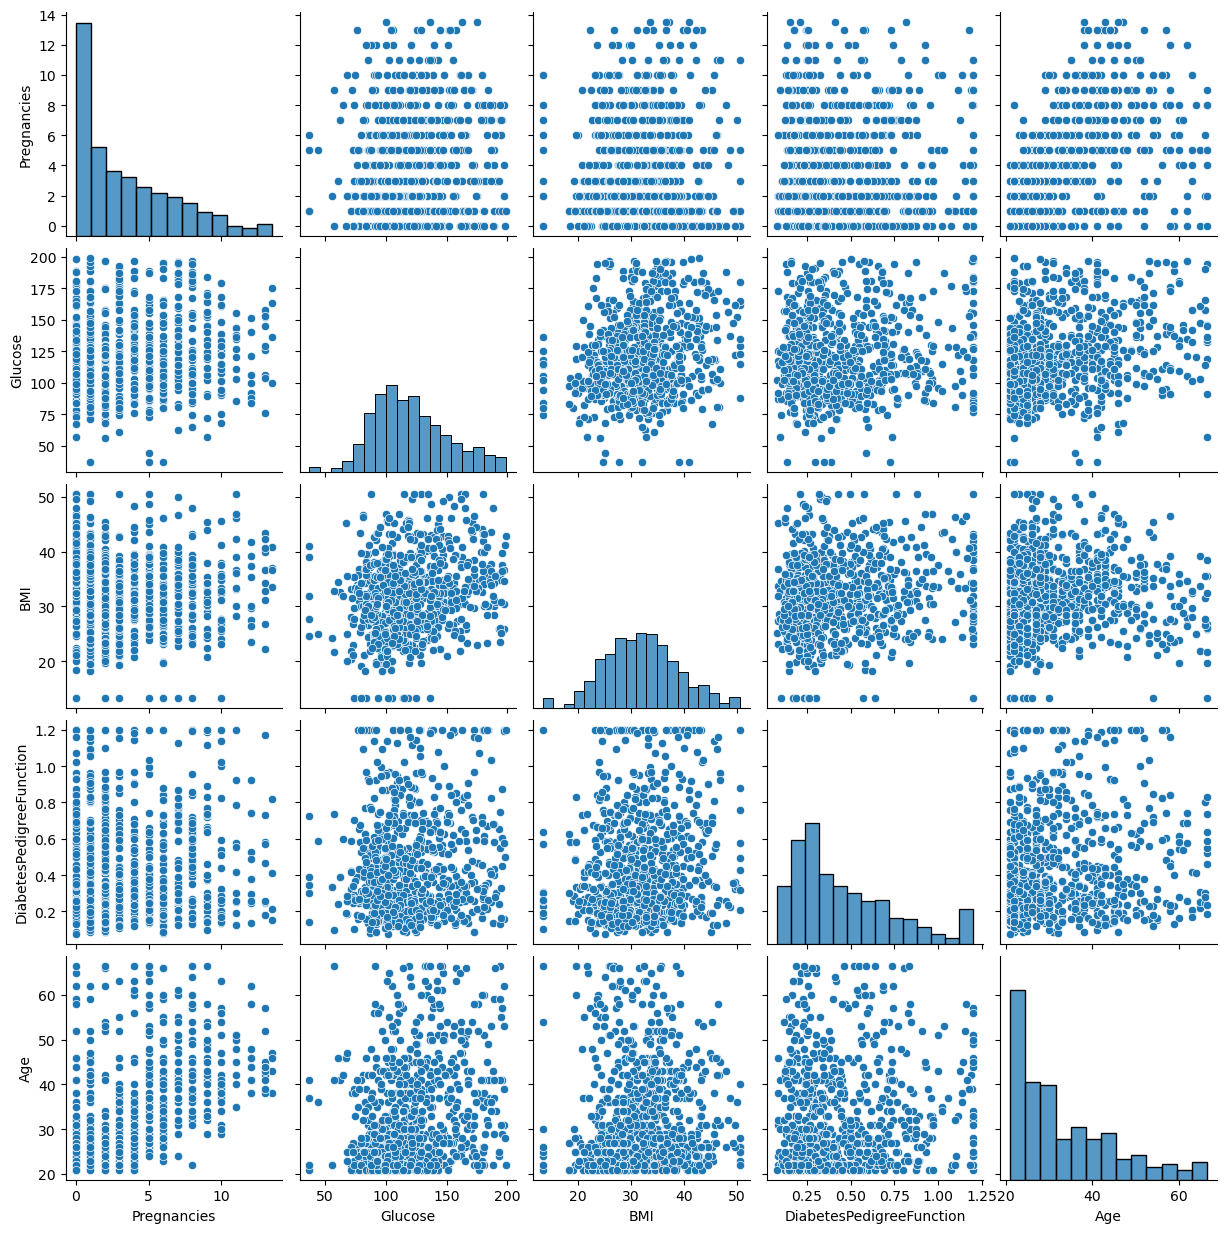

In [26]:
### pairplot
sns.pairplot(data=features)
plt.show()

In [27]:
### Three columns from features have been dropped as it has less correlation between the targets.

### 2) Data Preprocessing:

##### a) Handle missing values (e.g., imputation).

In [28]:
### The missing values was already checked in the EDA part and there were no missing values. So there is nothing to remove
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### b) Encode categorical variables.

In [29]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [30]:
### There is no categorical variable. So encoding is not possible.

### 3) Model Building:

##### a) Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [31]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 5)
(192, 5)
(576, 1)
(192, 1)


In [32]:
features.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,33.6,0.627,50.0
1,1.0,85.0,26.6,0.351,31.0
2,8.0,183.0,23.3,0.672,32.0
3,1.0,89.0,28.1,0.167,21.0
4,0.0,137.0,43.1,1.200,33.0


In [33]:
std_sca=StandardScaler()
x_train.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
579,2.0,197.0,34.7,0.575,62.0
46,1.0,146.0,29.7,0.564,29.0
508,2.0,84.0,30.4,0.968,21.0
384,1.0,125.0,24.3,0.221,25.0
163,2.0,100.0,29.7,0.368,21.0


In [34]:
df['Pregnancies'].unique()

array([ 6. ,  1. ,  8. ,  0. ,  5. ,  3. , 10. ,  2. ,  4. ,  7. ,  9. ,
       11. , 13. , 13.5, 12. ])

In [35]:
x_train[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]=std_sca.fit_transform(x_train[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']])

In [36]:
x_train.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
579,-0.540390,2.427707,0.386540,0.448686,62.0
46,-0.845701,0.790749,-0.306676,0.409892,29.0
508,-0.540390,-1.199278,-0.209626,1.834715,21.0
384,-0.845701,0.116708,-1.055349,-0.799798,25.0
163,-0.540390,-0.685723,-0.306676,-0.281360,21.0


In [37]:
x_test[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']]=std_sca.fit_transform(x_test[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction']])

In [38]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [39]:
x_test.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
173,-0.861741,-1.328942,1.658307,0.643887,23.0
253,-1.145297,-1.104530,0.468912,-0.881936,25.0
207,0.272479,1.331947,0.762399,-1.183633,52.0
737,1.123144,-1.777767,-0.118063,0.373400,42.0
191,1.406699,0.081650,0.051851,-0.410318,40.0


##### b. Train the model using the training data.


In [40]:
log_model=LogisticRegression() ## It is a binary class
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
### Training Validation
y_pred=log_model.predict(x_train)
accuracy_score(y_pred,y_train)

0.7864583333333334

### 4) Model Evaluation:

##### a) Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.

In [42]:
### testing validation
y_pred1=log_model.predict(x_test)
accuracy_score(y_pred1,y_test)

0.7291666666666666

In [43]:
y_test.value_counts()

Outcome
0          127
1           65
Name: count, dtype: int64

In [44]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       127
           1       0.62      0.52      0.57        65

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.68       192
weighted avg       0.72      0.73      0.72       192



##### b) Visualize the ROC curve.

In [45]:
### sigmoid value
sigmoid=log_model.predict_proba(x_test)[:,1]
sigmoid

array([0.17589542, 0.0556981 , 0.75482527, 0.08805147, 0.41246679,
       0.70210119, 0.96186225, 0.11678149, 0.92725993, 0.20037368,
       0.09365891, 0.88759562, 0.65858524, 0.29347467, 0.70187385,
       0.27330038, 0.05790186, 0.2370665 , 0.54676522, 0.10624472,
       0.27407976, 0.00781495, 0.61170658, 0.9835175 , 0.22100746,
       0.82940187, 0.53613365, 0.29357329, 0.33399858, 0.57262816,
       0.03992009, 0.97004727, 0.13632115, 0.50192621, 0.18952639,
       0.2736387 , 0.92581939, 0.02101379, 0.22342428, 0.19890603,
       0.28884758, 0.83068298, 0.46672024, 0.06083158, 0.23732323,
       0.92665005, 0.08188142, 0.20802511, 0.87486952, 0.84680063,
       0.11302103, 0.03243938, 0.34848921, 0.75788737, 0.73507158,
       0.9115337 , 0.07818499, 0.05413616, 0.79724066, 0.06842162,
       0.15373053, 0.15608543, 0.30963105, 0.27581112, 0.32389733,
       0.22524117, 0.13243358, 0.02105221, 0.19658966, 0.02429086,
       0.00906334, 0.73025713, 0.09056374, 0.21235679, 0.13184

In [46]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

0.7739551786795882

In [47]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)

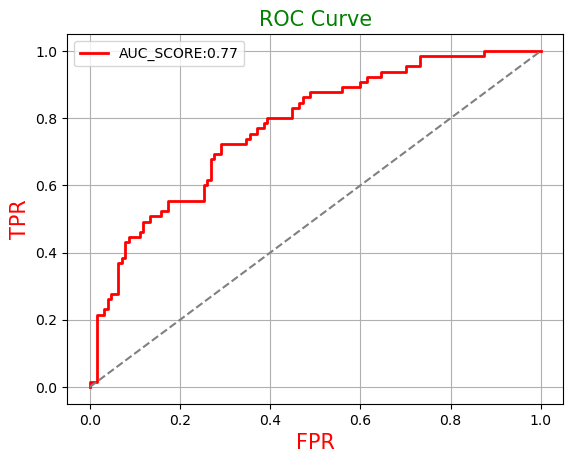

In [48]:
plt.plot(fpr,tpr,color='red',linewidth=2,label=f'AUC_SCORE:{auc_score:.2f}') # to display the auc_score in the graph
plt.plot([0,1],linestyle='--',color='grey')
plt.grid()
plt.xlabel('FPR',size=15,color='red')
plt.ylabel('TPR',size=15,color='red')
plt.title("ROC Curve",color="green",size=15)
plt.legend()
plt.show()

### 5) Interpretation:

##### a) Interpret the coefficients of the logistic regression model.

In [49]:
log_model.coef_

array([[0.32815479, 1.16901258, 0.67828729, 0.45321905, 0.02145034]])

##### b) Discuss the significance of features in predicting the target variable (survival probability in this case).

In [50]:
coefficients = log_model.coef_[0]
feature_names = features.columns
coef_df = pd.DataFrame({
    'Feature': feature_names, 
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

In [51]:
print(coef_df.to_string(index=False))

                 Feature  Coefficient
                 Glucose     1.169013
                     BMI     0.678287
DiabetesPedigreeFunction     0.453219
             Pregnancies     0.328155
                     Age     0.021450


### 6) Deployment with Streamlit:

##### In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

In [52]:
import pickle

In [53]:
file='log30.pkl'

In [54]:
pickle.dump(log_model,open(file,'wb'))

### Interview Questions:

##### 1) What is the difference between precision and recall?

##### 2) What is cross-validation, and why is it important in binary classification?